<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu%20M%20Assignment%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 a)	What are vanishing and exploding gradients? How do they affect neural networks? Explain in detail.

**Vanishing gradients:**

As error gradients are backpropagated, their values shrink exponentially,often due to activation functions (like sigmoid or tanh) with derivatives<1 or due to small weight magnitudes. As a result, early layers barely receive a learning signal

Diminished signal strength: When gradients are repeatedly multiplied during backpropagation—especially in deep networks or RNNs—they can shrink exponentially, leading to negligible updates in earlier layers

Slow learning or stagnation: Because early-layer weights barely change, training becomes painfully slow or even stalls entirely

Poor long-term dependency learning in RNNs: In recurrent architectures, the gradient may vanish over many time steps, making long-range dependencies unrecoverable. Models effectively ignore distant relationships

Under-performing feature extraction: Initial layers, which are crucial for learning basic features, fail to train properly—resulting in suboptimal representations and lower overall performance

**Exploding gradients:**

Conversely, gradients can grow exponentially during training,especially when weights are large (>1) or repeated multiplications amplify signals. This causes erratic updates and potential numeric overflow (NaNs)

Unstable training: Large gradients lead to overly large weight updates, causing oscillations in the loss and preventing convergence to a useful solution

Numerical breakdown: In extreme cases, gradients or weights overflow and become NaN or Inf, crashing the training process entirely

Poor generalization: Even before a crash, unstable updates can lead the model toward overfit or unreliable convergence, harming performance on unseen data

Particularly problematic in deep or recurrent networks: RNNs are especially vulnerable, as the same weight matrix is applied repeatedly across many time steps, amplifying the risk of gradient explosion

b)	Use the Life Expectancy Prediction dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab to predict the life expectancy.


In [1]:
#i.	Download the dataset from above link and load it into your Python environment.
import pandas as pd

# Load the dataset
file_path = "/content/Life Expectancy Data.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


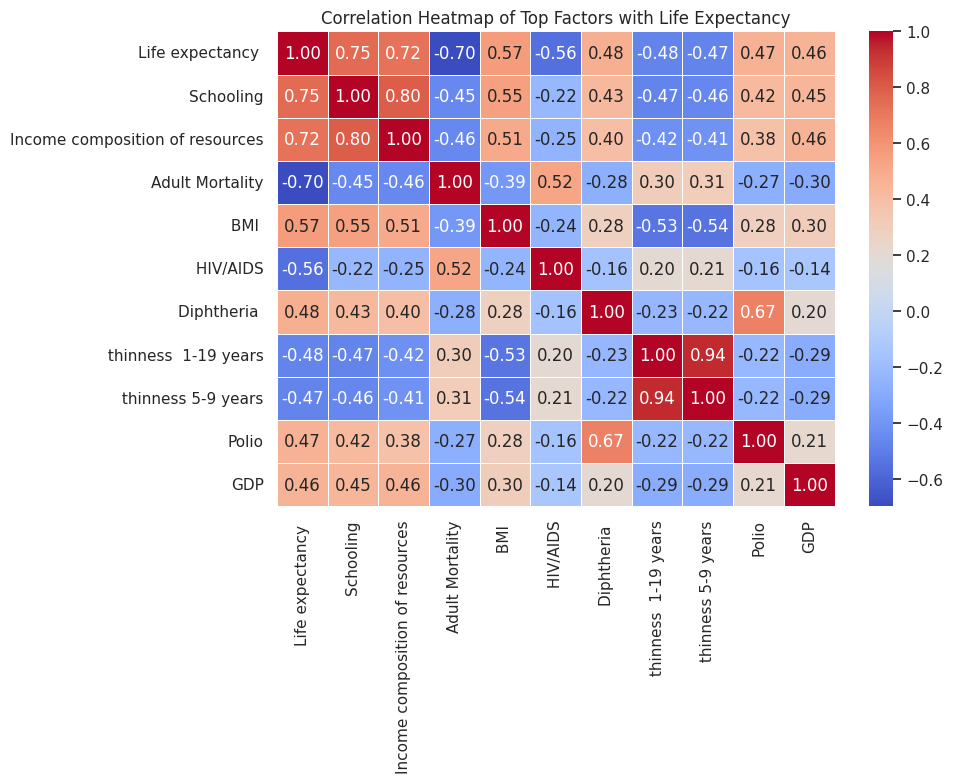

({'shape': (2938, 22),
  'columns': ['Country',
   'Year',
   'Status',
   'Life expectancy ',
   'Adult Mortality',
   'infant deaths',
   'Alcohol',
   'percentage expenditure',
   'Hepatitis B',
   'Measles ',
   ' BMI ',
   'under-five deaths ',
   'Polio',
   'Total expenditure',
   'Diphtheria ',
   ' HIV/AIDS',
   'GDP',
   'Population',
   ' thinness  1-19 years',
   ' thinness 5-9 years',
   'Income composition of resources',
   'Schooling'],
  'missing_values': Population                         652
  Hepatitis B                        553
  GDP                                448
  Total expenditure                  226
  Alcohol                            194
  Income composition of resources    167
  Schooling                          163
   thinness  1-19 years               34
   thinness 5-9 years                 34
   BMI                                34
  Diphtheria                          19
  Polio                               19
  Life expectancy                 

In [3]:
#ii.	Perform the EDA and do the visualizations.
import matplotlib.pyplot as plt
import seaborn as sns

basic_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "missing_values": df.isnull().sum().sort_values(ascending=False),
    "data_types": df.dtypes
}

# Display summary statistics
summary_stats = df.describe()

# Check for correlation
correlation_matrix = df.corr(numeric_only=True)

# Set visual style
sns.set(style="whitegrid")

# Visualization: Heatmap of correlation matrix (top 10 correlated features with Life expectancy)
top_corr = correlation_matrix["Life expectancy "].abs().sort_values(ascending=False).head(11).index
top_corr_matrix = df[top_corr].corr()

# Plotting
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top Factors with Life Expectancy")
plt.tight_layout()

plt.show()

basic_info, summary_stats.head()

In [5]:
#iii.	Check the distributions/skewness in the variables and do the transformations if required.
from scipy.stats import skew
import numpy as np
# Select only numerical columns for skewness analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness
skewness_vals = df[numeric_cols].skew(skipna=True).sort_values(ascending=False)

# Identify highly skewed features (absolute skewness > 1)
high_skew = skewness_vals[abs(skewness_vals) > 1]

# Apply log1p transformation to positively skewed features (ignoring negative/zero values)
df_transformed = df.copy()
for col in high_skew.index:
    if (df[col] > 0).all():
        df_transformed[col] = np.log1p(df[col])

# Recalculate skewness after transformation
new_skewness = df_transformed[high_skew.index].skew(skipna=True)

# Combine before and after skewness for comparison
skew_comparison = pd.DataFrame({
    "Original Skew": skewness_vals[high_skew.index],
    "Transformed Skew": new_skewness
})

skew_comparison


,Original Skew,Transformed Skew
Population,15.916236,15.916236
infant deaths,9.786963,9.786963
under-five deaths,9.495065,9.495065
Measles,9.441332,9.441332
HIV/AIDS,5.396112,2.127285
percentage expenditure,4.652051,4.652051
GDP,3.206655,3.206655
thinness 5-9 years,1.777424,1.777424
thinness 1-19 years,1.711471,1.711471
Adult Mortality,1.174369,1.174369


In [6]:
#iv.	Check/Treat the outliers and do the feature scaling if required.
from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Outlier detection using IQR method
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Apply Z-score scaling (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Summarize number of outliers in each numeric column
outlier_summary_sorted = dict(sorted(outlier_summary.items(), key=lambda item: item[1], reverse=True))

outlier_summary_sorted


{'Measles ': 542,
 ' HIV/AIDS': 542,
 'under-five deaths ': 394,
 'percentage expenditure': 389,
 'GDP': 365,
 'infant deaths': 315,
 'Diphtheria ': 298,
 'Population': 294,
 'Polio': 279,
 'Hepatitis B': 254,
 'Income composition of resources': 130,
 ' thinness 5-9 years': 96,
 ' thinness  1-19 years': 89,
 'Adult Mortality': 82,
 'Schooling': 44,
 'Total expenditure': 32,
 'Life expectancy ': 10,
 'Year': 0,
 'Alcohol': 0,
 ' BMI ': 0}

In [7]:
#v.	Build Deep Learning model using ANN with multiple hidden layers.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical columns
df['Status'] = LabelEncoder().fit_transform(df['Status'])
df.drop(columns=['Country'], inplace=True)

# Split features and target
X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# Evaluate model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4588.7217 - mae: 67.0507 - val_loss: 3389.4707 - val_mae: 57.4751
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2520.9263 - mae: 47.5119 - val_loss: 515.8529 - val_mae: 18.5059
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 393.5023 - mae: 15.7851 - val_loss: 175.7435 - val_mae: 10.4715
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 151.3696 - mae: 9.8902 - val_loss: 141.9743 - val_mae: 9.4021
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.7337 - mae: 8.5323 - val_loss: 122.6602 - val_mae: 8.8257
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94.5817 - mae: 7.6655 - val_loss: 118.5073 - val_mae: 8.6331
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.8833 - mae: 7.3452 - val_loss: 100.7093 - val_mae: 8.0885
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.4180 - mae: 7.0004 - val_loss: 94.3098 - val_mae: 7.7958
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━

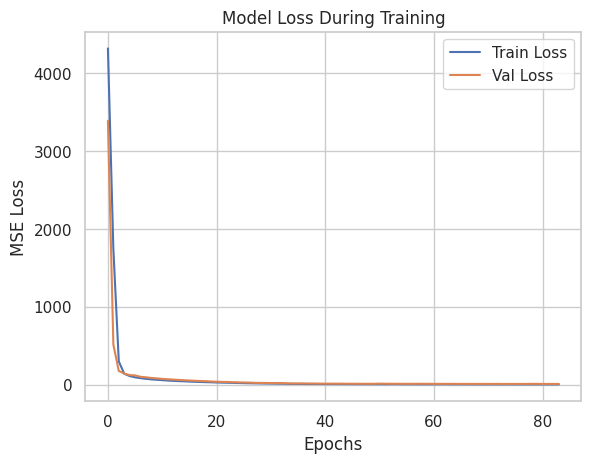

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [9]:
#vi.	Apply the dropout regularization and early stopping techniques to improve model performance.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build ANN model with Dropout
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))  # Output layer

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate on test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4681.2461 - mae: 67.8055 - val_loss: 3914.7310 - val_mae: 62.0260
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3246.6880 - mae: 55.3308 - val_loss: 902.3415 - val_mae: 26.9201
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 854.8760 - mae: 24.0597 - val_loss: 238.1130 - val_mae: 12.8044
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 462.3045 - mae: 17.9577 - val_loss: 142.8715 - val_mae: 9.4511
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 380.0595 - mae: 15.8108 - val_loss: 133.9771 - val_mae: 9.2766
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 377.5080 - mae: 15.5007 - val_loss: 111.1957 - val_mae: 8.3571
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 359.6866 - mae: 15.2129 - val_loss: 114.9670 - val_mae: 8.6159
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 356.8741 - mae: 15.3218 - val_loss: 121.8073 - val_mae: 8.9462
Epoch 9/100
33/33

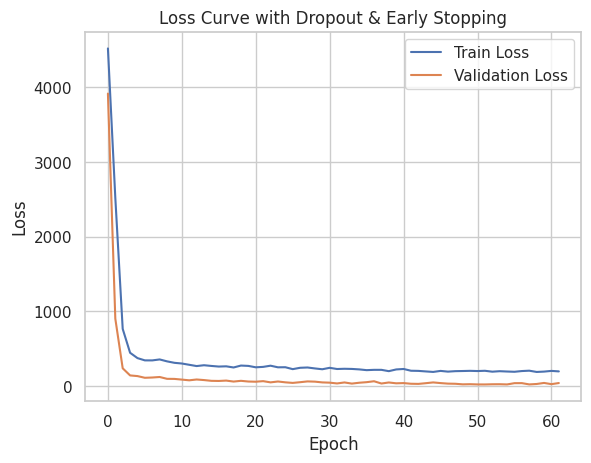

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve with Dropout & Early Stopping")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
#vii.	Use the modelCheckpoint also to store the parameters after each epoch.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define checkpoint path
checkpoint_path = "best_ann_model.h5"

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,  # Set True if saving only weights
                             verbose=1)

# Build model (same as before)
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))  # Output layer

# Compile
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop, checkpoint],
                    verbose=1)

# Load the best saved model (optional after training)
from tensorflow.keras.models import load_model
best_model = load_model(checkpoint_path)

# Evaluate the best model on test data
loss, mae = best_model.evaluate(X_test, y_test)
print(f"Best model Test MAE: {mae:.2f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4782.4453 - mae: 68.6259
Epoch 1: val_loss improved from inf to 4044.43896, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4731.9697 - mae: 68.2334 - val_loss: 4044.4390 - val_mae: 63.1473
Epoch 2/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3622.2036 - mae: 59.1691  
Epoch 2: val_loss improved from 4044.43896 to 894.02942, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3387.3381 - mae: 56.7526 - val_loss: 894.0294 - val_mae: 26.6390
Epoch 3/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 914.9210 - mae: 24.7147   
Epoch 3: val_loss improved from 894.02942 to 252.15613, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 871.8847 - mae: 23.9225 - val_loss: 252.1561 - val_mae: 13.1020
Epoch 4/100
22/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 475.1655 - mae: 17.5926  
Epoch 4: val_loss improved from 252.15613 to 187.78664, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 463.2160 - mae: 17.3669 - val_loss: 187.7866 - val_mae: 11.3803
Epoch 5/100
22/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 411.4924 - mae: 16.5683 
Epoch 5: val_loss improved from 187.78664 to 153.09441, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 406.7534 - mae: 16.3996 - val_loss: 153.0944 - val_mae: 10.2311
Epoch 6/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 396.6145 - mae: 15.8366  
Epoch 6: val_loss improved from 153.09441 to 123.50392, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 388.9077 - mae: 15.6868 - val_loss: 123.5039 - val_mae: 8.9535
Epoch 7/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323.6454 - mae: 14.5037 
Epoch 7: val_loss improved from 123.50392 to 106.26259, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 322.0358 - mae: 14.5017 - val_loss: 106.2626 - val_mae: 8.2472
Epoch 8/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 317.8677 - mae: 14.5575  
Epoch 8: val_loss improved from 106.26259 to 98.63064, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 313.1992 - mae: 14.4435 - val_loss: 98.6306 - val_mae: 8.0520
Epoch 9/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266.1157 - mae: 13.1833  
Epoch 9: val_loss improved from 98.63064 to 92.17999, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 268.5685 - mae: 13.2330 - val_loss: 92.1800 - val_mae: 7.7776
Epoch 10/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252.6862 - mae: 12.9054  
Epoch 10: val_loss improved from 92.17999 to 91.49081, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 257.6332 - mae: 12.9860 - val_loss: 91.4908 - val_mae: 7.7951
Epoch 11/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 276.3606 - mae: 13.5389 
Epoch 11: val_loss improved from 91.49081 to 82.05388, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 273.0655 - mae: 13.4242 - val_loss: 82.0539 - val_mae: 7.2978
Epoch 12/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 274.3036 - mae: 13.2212 
Epoch 12: val_loss did not improve from 82.05388
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 270.4272 - mae: 13.1407 - val_loss: 83.4183 - val_mae: 7.3955
Epoch 13/100
30/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 274.6016 - mae: 13.3936
Epoch 13: val_loss improved from 82.05388 to 74.87254, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 275.5132 - mae: 13.4202 - val_loss: 74.8725 - val_mae: 6.9889
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 233.7093 - mae: 12.4906
Epoch 14: val_loss improved from 74.87254 to 73.64603, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 233.9875 - mae: 12.4979 - val_loss: 73.6460 - val_mae: 6.8891
Epoch 15/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.4682 - mae: 13.4514
Epoch 15: val_loss improved from 73.64603 to 67.06237, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 282.3105 - mae: 13.4116 - val_loss: 67.0624 - val_mae: 6.6590
Epoch 16/100
30/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250.6524 - mae: 12.6447
Epoch 16: val_loss improved from 67.06237 to 62.68084, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 249.0408 - mae: 12.6087 - val_loss: 62.6808 - val_mae: 6.3943
Epoch 17/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240.3984 - mae: 12.1715 
Epoch 17: val_loss did not improve from 62.68084
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 239.1376 - mae: 12.1807 - val_loss: 64.8336 - val_mae: 6.5573
Epoch 18/100
21/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 231.5873 - mae: 12.4438  
Epoch 18: val_loss improved from 62.68084 to 57.64190, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 227.6287 - mae: 12.3076 - val_loss: 57.6419 - val_mae: 6.1108
Epoch 19/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230.0057 - mae: 12.0000 
Epoch 19: val_loss improved from 57.64190 to 52.29571, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 227.0992 - mae: 11.9496 - val_loss: 52.2957 - val_mae: 5.6761
Epoch 20/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242.1992 - mae: 12.3350 
Epoch 20: val_loss did not improve from 52.29571
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 238.8441 - mae: 12.2627 - val_loss: 58.3992 - val_mae: 6.1957
Epoch 21/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 231.1760 - mae: 12.4063  
Epoch 21: val_loss improved from 52.29571 to 51.19046, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 233.1265 - mae: 12.4786 - val_loss: 51.1905 - val_mae: 5.6473
Epoch 22/100
21/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 251.0274 - mae: 12.6566  
Epoch 22: val_loss improved from 51.19046 to 47.80189, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 242.9478 - mae: 12.4719 - val_loss: 47.8019 - val_mae: 5.3938
Epoch 23/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 232.5681 - mae: 12.3319  
Epoch 23: val_loss did not improve from 47.80189
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 230.5516 - mae: 12.2668 - val_loss: 55.4962 - val_mae: 6.0445
Epoch 24/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222.0370 - mae: 12.0138 
Epoch 24: val_loss improved from 47.80189 to 43.49682, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 223.7811 - mae: 12.0506 - val_loss: 43.4968 - val_mae: 5.3278
Epoch 25/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 226.8913 - mae: 11.9718  
Epoch 25: val_loss did not improve from 43.49682
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 228.6073 - mae: 12.0338 - val_loss: 53.0339 - val_mae: 6.0178
Epoch 26/100
21/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 190.3820 - mae: 10.9829 
Epoch 26: val_loss did not improve from 43.49682
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 201.8346 - mae: 11.3416 - val_loss: 57.4396 - val_mae: 6.2149
Epoch 27/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208.9777 - mae: 11.5699  
Epoch 27: val_loss did not improve from 43.49682
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 214.0232 - mae: 11.6837 - val_loss: 59.0946 - val_mae: 6.4618
Epoch 28/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210.0887 - mae: 11.4453  
Epoch 28: val_loss did not improve from 43.49682
33/33 ━━━━━━━━━━━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 229.1151 - mae: 12.2485 - val_loss: 41.8350 - val_mae: 5.2803
Epoch 30/100
22/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 199.6695 - mae: 11.6231  
Epoch 30: val_loss did not improve from 41.83504
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 200.8218 - mae: 11.5957 - val_loss: 47.9534 - val_mae: 5.7575
Epoch 31/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 198.0079 - mae: 11.2871 
Epoch 31: val_loss did not improve from 41.83504
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 199.7557 - mae: 11.3515 - val_loss: 44.6755 - val_mae: 5.4762
Epoch 32/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209.4047 - mae: 11.8098  
Epoch 32: val_loss did not improve from 41.83504
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 208.4461 - mae: 11.7360 - val_loss: 55.3872 - val_mae: 6.2957
Epoch 33/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209.5326 - mae: 11.7061 
Epoch 33: val_loss did not improve from 41.83504
33/33 ━━━━━━━━━━━━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 187.2699 - mae: 10.9931 - val_loss: 32.7995 - val_mae: 4.5242
Epoch 35/100
22/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196.0456 - mae: 11.3823  
Epoch 35: val_loss did not improve from 32.79947
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 193.6819 - mae: 11.2851 - val_loss: 36.9839 - val_mae: 4.9467
Epoch 36/100
22/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184.9907 - mae: 11.0568  
Epoch 36: val_loss did not improve from 32.79947
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 188.2526 - mae: 11.1040 - val_loss: 33.9406 - val_mae: 4.7052
Epoch 37/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197.1139 - mae: 11.1765  
Epoch 37: val_loss did not improve from 32.79947
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 197.1890 - mae: 11.2009 - val_loss: 35.3043 - val_mae: 4.8069
Epoch 38/100
22/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203.2100 - mae: 11.1374  
Epoch 38: val_loss did not improve from 32.79947
33/33 ━━━━━━━━━━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 194.4981 - mae: 11.3281 - val_loss: 27.0242 - val_mae: 3.9872
Epoch 42/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178.4811 - mae: 10.7119 
Epoch 42: val_loss did not improve from 27.02422
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 179.2319 - mae: 10.7403 - val_loss: 27.5232 - val_mae: 4.2315
Epoch 43/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170.0449 - mae: 10.5956 
Epoch 43: val_loss improved from 27.02422 to 26.88579, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.5527 - mae: 10.6885 - val_loss: 26.8858 - val_mae: 4.1842
Epoch 44/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.9850 - mae: 11.4529  
Epoch 44: val_loss improved from 26.88579 to 26.57859, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 196.5323 - mae: 11.4260 - val_loss: 26.5786 - val_mae: 4.1894
Epoch 45/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197.8603 - mae: 11.1667 
Epoch 45: val_loss did not improve from 26.57859
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 198.8493 - mae: 11.2021 - val_loss: 27.3149 - val_mae: 4.2588
Epoch 46/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165.2971 - mae: 10.1930
Epoch 46: val_loss improved from 26.57859 to 25.56707, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 174.2362 - mae: 10.4874 - val_loss: 25.5671 - val_mae: 3.9874
Epoch 47/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208.4817 - mae: 11.6273 
Epoch 47: val_loss improved from 25.56707 to 24.80309, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 207.8542 - mae: 11.5806 - val_loss: 24.8031 - val_mae: 3.8216
Epoch 48/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196.5822 - mae: 11.0700 
Epoch 48: val_loss improved from 24.80309 to 23.93185, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 195.1422 - mae: 11.0765 - val_loss: 23.9319 - val_mae: 3.7334
Epoch 49/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 187.0353 - mae: 11.0403
Epoch 49: val_loss did not improve from 23.93185
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 187.8421 - mae: 11.0623 - val_loss: 24.2362 - val_mae: 3.8253
Epoch 50/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.2482 - mae: 10.4560 
Epoch 50: val_loss did not improve from 23.93185
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.3374 - mae: 10.5553 - val_loss: 24.9609 - val_mae: 3.8836
Epoch 51/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195.4372 - mae: 11.4157  
Epoch 51: val_loss did not improve from 23.93185
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 193.8847 - mae: 11.2863 - val_loss: 30.2518 - val_mae: 4.5011
Epoch 52/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201.5276 - mae: 11.0464  
Epoch 52: val_loss did not improve from 23.93185
33/33 ━━━━━━━━━━━━━━━━━━━━ 

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 186.7793 - mae: 10.8508 - val_loss: 23.1275 - val_mae: 3.8516
Epoch 54/100
26/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 205.7549 - mae: 11.7002
Epoch 54: val_loss did not improve from 23.12749
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 204.7191 - mae: 11.6344 - val_loss: 24.0104 - val_mae: 3.8159
Epoch 55/100
30/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 189.6278 - mae: 10.9232
Epoch 55: val_loss did not improve from 23.12749
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 190.8471 - mae: 10.9773 - val_loss: 26.5157 - val_mae: 4.1458
Epoch 56/100
28/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 180.4012 - mae: 10.8333
Epoch 56: val_loss did not improve from 23.12749
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 182.5706 - mae: 10.9005 - val_loss: 32.8212 - val_mae: 4.5925
Epoch 57/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 172.1617 - mae: 10.5883
Epoch 57: val_loss improved from 23.12749 to 20.97557, saving model to best_ann_

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 176.5617 - mae: 10.7344 - val_loss: 20.9756 - val_mae: 3.6417
Epoch 58/100
31/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 187.4645 - mae: 11.0657
Epoch 58: val_loss improved from 20.97557 to 20.96204, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 187.4840 - mae: 11.0563 - val_loss: 20.9620 - val_mae: 3.5555
Epoch 59/100
27/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 184.1645 - mae: 10.7614
Epoch 59: val_loss did not improve from 20.96204
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 185.3952 - mae: 10.8132 - val_loss: 25.1516 - val_mae: 3.9313
Epoch 60/100
28/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 218.6206 - mae: 11.8827
Epoch 60: val_loss did not improve from 20.96204
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 215.6884 - mae: 11.7700 - val_loss: 22.9378 - val_mae: 3.7516
Epoch 61/100
28/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 182.1746 - mae: 10.9011
Epoch 61: val_loss improved from 20.96204 to 20.09438, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 181.0183 - mae: 10.8597 - val_loss: 20.0944 - val_mae: 3.4932
Epoch 62/100
26/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 192.3181 - mae: 11.0617
Epoch 62: val_loss did not improve from 20.09438
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 188.1870 - mae: 10.9373 - val_loss: 24.4646 - val_mae: 4.0316
Epoch 63/100
16/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173.7070 - mae: 10.4044 
Epoch 63: val_loss did not improve from 20.09438
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 177.5634 - mae: 10.6007 - val_loss: 27.5536 - val_mae: 4.3099
Epoch 64/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179.6299 - mae: 10.6963
Epoch 64: val_loss did not improve from 20.09438
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 181.4681 - mae: 10.7539 - val_loss: 24.3931 - val_mae: 4.0188
Epoch 65/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 167.9242 - mae: 10.2233
Epoch 65: val_loss did not improve from 20.09438
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 163.6360 - mae: 10.2448 - val_loss: 19.9343 - val_mae: 3.5877
Epoch 67/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175.5159 - mae: 10.4631 
Epoch 67: val_loss improved from 19.93432 to 19.48962, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 175.1456 - mae: 10.4539 - val_loss: 19.4896 - val_mae: 3.5416
Epoch 68/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 163.8084 - mae: 10.1782 
Epoch 68: val_loss did not improve from 19.48962
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 163.6593 - mae: 10.1913 - val_loss: 23.9662 - val_mae: 4.0588
Epoch 69/100
22/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191.7632 - mae: 11.0603  
Epoch 69: val_loss did not improve from 19.48962
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 188.6051 - mae: 10.9650 - val_loss: 19.5199 - val_mae: 3.4597
Epoch 70/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176.3838 - mae: 10.5086 
Epoch 70: val_loss improved from 19.48962 to 18.04860, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 177.2320 - mae: 10.5589 - val_loss: 18.0486 - val_mae: 3.3957
Epoch 71/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 213.6949 - mae: 11.8316  
Epoch 71: val_loss did not improve from 18.04860
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 210.4151 - mae: 11.6682 - val_loss: 21.8258 - val_mae: 3.7565
Epoch 72/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 192.2598 - mae: 11.2589 
Epoch 72: val_loss did not improve from 18.04860
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 189.3296 - mae: 11.1516 - val_loss: 19.2346 - val_mae: 3.3485
Epoch 73/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184.5238 - mae: 10.5425  
Epoch 73: val_loss did not improve from 18.04860
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 182.3702 - mae: 10.5550 - val_loss: 26.6649 - val_mae: 4.3088
Epoch 74/100
21/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 178.3190 - mae: 10.6324 
Epoch 74: val_loss did not improve from 18.04860
33/33 ━━━━━━━━━━━━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 173.2454 - mae: 10.6097 - val_loss: 15.7486 - val_mae: 3.0120
Epoch 78/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 164.9000 - mae: 10.3392
Epoch 78: val_loss improved from 15.74865 to 14.65456, saving model to best_ann_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 166.4361 - mae: 10.3986 - val_loss: 14.6546 - val_mae: 2.9356
Epoch 79/100
25/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171.3361 - mae: 10.3826  
Epoch 79: val_loss did not improve from 14.65456
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.1076 - mae: 10.4278 - val_loss: 15.8402 - val_mae: 3.0472
Epoch 80/100
24/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170.4277 - mae: 10.5360
Epoch 80: val_loss did not improve from 14.65456
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 170.6179 - mae: 10.5133 - val_loss: 17.0238 - val_mae: 3.1034
Epoch 81/100
15/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 178.7958 - mae: 10.4742 
Epoch 81: val_loss did not improve from 14.65456
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 180.4390 - mae: 10.5631 - val_loss: 14.7052 - val_mae: 3.0189
Epoch 82/100
23/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177.9709 - mae: 10.5896 
Epoch 82: val_loss did not improve from 14.65456
33/33 ━━━━━━━━━━━━━━━━━━━━ 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.4682 - mean_absolute_error: 2.6334 
Best model Test MAE: 2.80


In [15]:
#viii.	Use the KerasTuner to tune to best parameters (No. of hidden layers, optimizers, loss function, activation functions etc.)
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32),
                    activation=hp.Choice('act_input', values=['relu', 'tanh']),
                    input_dim=X_train.shape[1]))

    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                        activation=hp.Choice(f'act_{i}', values=['relu', 'tanh'])))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))  # Regression output

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model


In [16]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,            # number of models to try
    executions_per_trial=1,   # average over multiple runs if >1
    directory='ann_tuner',
    project_name='life_expectancy_ann'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
tuner.search(X_train, y_train,
             validation_split=0.2,
             epochs=50,
             batch_size=32,
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
             verbose=1)


Trial 10 Complete [00h 00m 17s]
val_loss: 62.407291412353516

Best val_loss So Far: 9.82857608795166
Total elapsed time: 00h 02m 29s


In [18]:
# Get the best model and hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.get_best_models(1)[0]

# Evaluate best model
loss, mae = best_model.evaluate(X_test, y_test)
print(f"Tuned model MAE: {mae:.2f}")

# Show best config
print("Best Hyperparameters:")
for k, v in best_hp.values.items():
    print(f"{k}: {v}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8604 - mae: 2.2706  
Tuned model MAE: 2.31
Best Hyperparameters:
units_input: 96
act_input: relu
num_layers: 2
units_0: 64
act_0: tanh
dropout_0: 0.4
optimizer: rmsprop
units_1: 96
act_1: relu
dropout_1: 0.2
units_2: 128
act_2: tanh
dropout_2: 0.1


In [22]:
#ix.	Compare the accuracies of different models and finalize the best model.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_preds)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)

# Print
print(f"Linear Regression MAE: {lr_mae:.2f}")
print(f"Random Forest MAE: {rf_mae:.2f}")


Linear Regression MAE: 2.75
Random Forest MAE: 1.12
